In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
def h(X, w):
    return np.dot(X, w)

In [40]:
def loss_function(X, y, w):
    m = X.shape[0]
    return np.square(h(X, w) - y).sum() / (2*m)

In [23]:
def gradient(X, y, w):
    m = X.shape[0]
    res = h(X, w) - y
    return np.dot(X.T, res) / m

In [24]:
def gradient_step(w, grad, learning_rate = 0.01):
    return w - learning_rate * grad.reshape(w.shape)

In [25]:
def gradient_descent(X, y, w, num_iter=1000, learning_rate = 0.01):
    loss = loss_function(X, y, w)
    loss_history = [loss]
    min_loss = float('inf')
    w_best = None
    for i in range(num_iter):
        w = gradient_step(X, y, w, learning_rate)
        loss = loss_function(X, y, w)
        loss_history.append(loss)
        
        if loss < min_loss:
            min_loss = loss
            w_best = w

    return w, w_best, min_loss, loss_history

In [41]:
data = pd.read_csv('Housing.csv')

In [42]:
X = data[['area', 'bathrooms', 'bedrooms']].values
y = data['price'].values

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()
X = np.hstack((np.ones((X.shape[0], 1)) , X))
y = y.reshape((y.shape[0], 1))

n = X.shape[1]
w = np.linspace(0, 0, n).reshape((n, 1))

In [58]:
best_loss = float('inf')
best_weights = None
loss_history = []
learning_rate = 0.01
num_iterations = 1000
for i in range(num_iterations):
    grad = gradient(X, y, w)
    w = w - learning_rate * grad
    loss = loss_function(X, y, w)
    loss_history.append(loss)
    if loss < best_loss:
        best_loss = loss
        best_weights = w
    
    if i % 100 == 0:
      print(f"iteration {i+1}: loss = {loss}")
print(f"Best weights: {best_weights}")
print(f"Best loss: {best_loss}")

iteration 1: loss = 0.3563068499104807
iteration 101: loss = 0.35630684337247875
iteration 201: loss = 0.3563068368344773
iteration 301: loss = 0.3563068302964764
iteration 401: loss = 0.35630682375847594
iteration 501: loss = 0.356306817220476
iteration 601: loss = 0.3563068106824767
iteration 701: loss = 0.3563068041444778
iteration 801: loss = 0.35630679760647943
iteration 901: loss = 0.35630679106848145
Best weights: [[-0.46550751]
 [ 0.67516815]
 [ 0.3049079 ]
 [ 0.30477885]]
Best loss: 0.35630678459586407


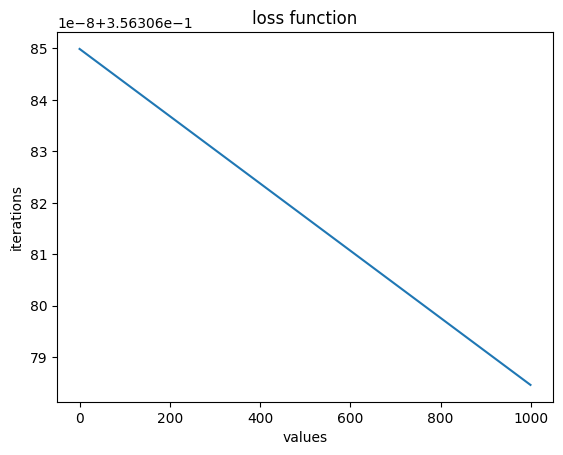

In [61]:
plt.plot(loss_history)
plt.title('loss function')
plt.xlabel('values')
plt.ylabel('iterations')
plt.show()
     

In [62]:
analitic_w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
analitic_loss = loss_function(X, y, analitic_w)
print('analitic w: ', analitic_w.flatten())
print('analitic loss function: ', analitic_loss)

analitic w:  [1.64622302e+03 5.53491387e-01 2.02545386e+03 5.94491886e+02]
analitic loss function:  0.25645846664706196


In [63]:
print('Learning value loss_function: ', min_loss)
print('Analitic value loss_function: ', analitic_loss)

Learning value loss_function:  0.35630652307638455
Analitic value loss_function:  0.25645846664706196
